# Prediction of Key Variables in Wastewater Treatment Plants Using Machine Learning Models

## Notebook developed for WCCI paper case study: <p style="color:blue">Total suspended solids (TSS).</p>

## Data Source: Benchmark Simulation Model No 2 - BSM2

## Objective: 
Predict TSS value at the exit of the primary clarifier

## Initial Exploratory Data Analysis

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets in csv: data at the entrance and exit of the primary clarifier
df_entrada = pd.read_csv('datasets/df_entrada.csv')
df_saida = pd.read_csv('datasets/df_saida.csv')

In [3]:
# Copy the TSS column from the df_saida table to a target column, and add it to the df_entrada table
df_entrada['TSS_target'] = df_saida['TSS']

In [4]:
# Dataset created
df_entrada.head()

time (d)        S_I        S_S        X_I         X_S      X_B,H     X_B,A  \
0  0.000000  28.066969  59.047313  94.355715  356.843407  50.894638  0.094638   
1  0.010417  30.359420  44.060564  98.451711  403.466911  54.971138  0.131598   
2  0.020833  30.603369  42.103457  97.134587  398.790339  54.515963  0.135572   
3  0.031250  30.767243  40.836855  96.364946  395.681291  54.445814  0.140303   
4  0.041667  30.892948  39.920278  95.873859  393.245228  54.560720  0.145232   

        X_P       S_O      S_NO       S_NH      S_ND       X_ND     S_ALK  \
0  0.653099  0.017547  0.117359  34.921458  5.545698  15.813178  7.696519   
1  0.873977  0.024448  0.163515  34.337683  5.882904  12.754084  7.733646   
2  0.897778  0.025447  0.170197  33.788222  5.796989  12.299091  7.737372   
3  0.926121  0.026709  0.178608  33.347855  5.754190  12.046154  7.741579   
4  0.955677  0.028096  0.187699  32.953289  5.739111  11.888264  7.745834   

          TSS     Flow_rate       Temp  TSS_target  
0  377.131123  21086.383772  14.858080  197.191670  
1  418.421501  15136.796894  15.133197  200.056489  
2  413.605679  14558.437403  15.104875  201.682964  
3  410.668856  13892.458337  15.075487  202.443577  
4  408.585538  13239.722803  15.045215  202.608927

In [5]:
# Data types
df_entrada.dtypes 

time (d)      float64
S_I           float64
S_S           float64
X_I           float64
X_S           float64
X_B,H         float64
X_B,A         float64
X_P           float64
S_O           float64
S_NO          float64
S_NH          float64
S_ND          float64
X_ND          float64
S_ALK         float64
TSS           float64
Flow_rate     float64
Temp          float64
TSS_target    float64
dtype: object

## Statistics

In [6]:
# Dataset statistics
df_entrada.describe()

time (d)           S_I           S_S           X_I           X_S  \
count  58465.000000  58465.000000  58465.000000  58465.000000  58465.000000   
mean     304.500000     28.711763     55.031135     92.683670    349.939382   
std      175.807668      5.261753     27.286952     32.142501    125.747710   
min        0.000000      3.228866      2.029307      5.302431     16.220839   
25%      152.250000     26.619894     32.786098     68.816825    254.503683   
50%      304.500000     29.569303     52.784428     95.351934    362.134558   
75%      456.750000     32.034821     73.845247    115.169477    439.177348   
max      609.000000     42.811628    152.733862    195.040792    734.648375   

              X_B,H         X_B,A           X_P           S_O          S_NO  \
count  58465.000000  58465.000000  58465.000000  58465.000000  58465.000000   
mean      50.277094      0.112603      0.669456      0.029041      0.199953   
std       17.685822      0.033974      0.194564      0.018470      0.112277   
min        3.184962      0.035112      0.265136      0.002616      0.020783   
25%       37.143276      0.087573      0.529146      0.015294      0.119407   
50%       51.755190      0.107786      0.645111      0.024008      0.172769   
75%       62.894520      0.133013      0.779249      0.037425      0.251631   
max      104.646205      0.289943      1.696809      0.139030      0.826227   

               S_NH          S_ND          X_ND         S_ALK           TSS  \
count  58465.000000  58465.000000  58465.000000  58465.000000  58465.000000   
mean      34.217139      5.256981     14.893292      7.719545    370.261652   
std        9.133215      2.258065      6.364040      0.051009    130.918483   
min        9.862565      0.188404      0.752687      7.523063     24.274806   
25%       27.497253      3.534590      9.839443      7.685509    270.994789   
50%       33.439312      5.108050     14.692575      7.720889    382.991612   
75%       40.093021      6.796648     19.486117      7.754191    462.998591   
max       66.332853     14.669929     35.831106      7.912450    775.441330   

          Flow_rate          Temp    TSS_target  
count  58465.000000  58465.000000  58465.000000  
mean   21498.710490     14.315433    197.244305  
std     8606.762398      3.422040     64.961050  
min     5633.157269      9.507123     15.790802  
25%    15214.485584     11.068180    148.505039  
50%    20297.635447     13.736294    203.370251  
75%    26037.574162     17.572444    242.896104  
max    60850.185755     20.489800    365.498340

### Correlations

In [7]:
plt.figure(figsize=(16, 10), dpi=1200)
#plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_entrada.corr(),annot_kws={"size": 8}, annot=True,vmin=-1, vmax=1,center= 0, cmap='cividis')
#heatmap.set_title('Correlation Heatmap - Decantador Primário', fontdict={'fontsize':16}, pad=12)
plt.tick_params(axis = 'x', labelsize = 14) # x font label size
plt.tick_params(axis = 'y', labelsize = 14) # y font label size

The models will be made with the highest correlations: TSS; S_I; S_NH; S_ND, X_ND  

## Prepare the data

### Split data into training and testing sets 
<img src="figures/f3.png" width="500">

In [8]:
df_treino = df_entrada[0:17280] # 180 days for training and testing
df_teste_final_lstm = df_entrada[34840:36001] # 10 days (holdout sample) for final test

In [9]:
# Adjust graph size
sns.set(rc={'figure.figsize':(15,8)})

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

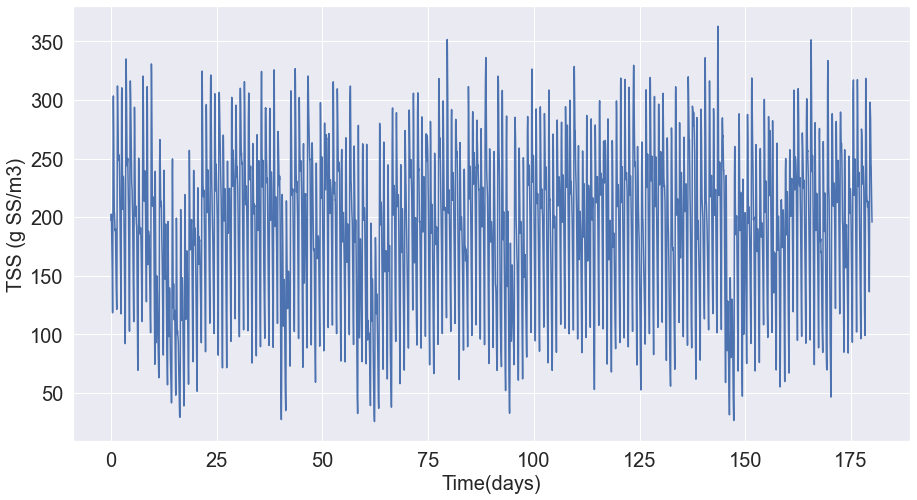

In [10]:
# 180 days for training and testing
p = sns.lineplot(x="time (d)", y="TSS_target", data=df_treino)
p.set_xlabel("Time(days)", fontsize = 20)
p.set_ylabel("TSS (g SS/m3)", fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('tss_final.pdf', dpi=500, format='pdf', bbox_inches='tight') 

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

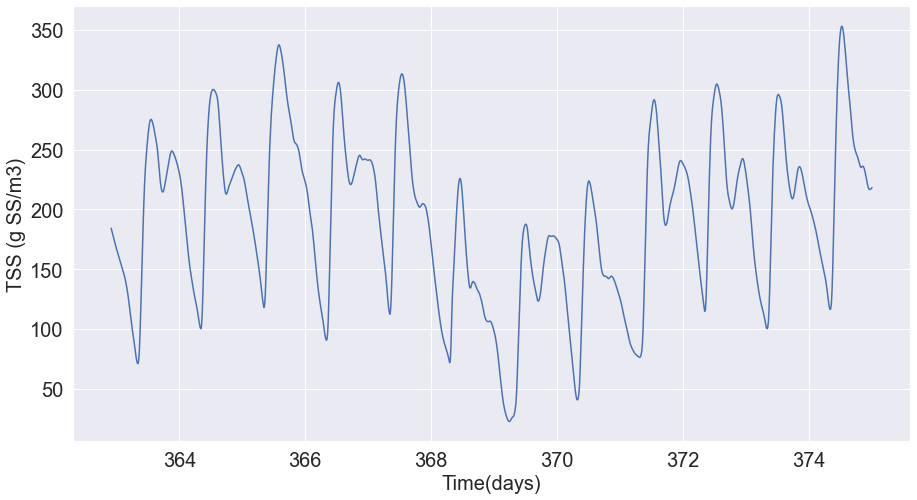

In [11]:
# 10 days for final evaluation
p = sns.lineplot(x="time (d)", y="TSS_target", data=df_teste_final_lstm)
p.set_xlabel("Time(days)", fontsize = 20)
p.set_ylabel("TSS (g SS/m3)", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)



#plt.savefig('tss_final2.pdf', dpi=500, format='pdf', bbox_inches='tight') 

In [12]:
# Copy dataset
df = df_treino.copy()

## Algorithms

### Algorithm 1: Long short-term memory (LSTM)

#### Preparing data for the algorithm

In [13]:
df_for_training = df.filter(['TSS_target','S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)

In [14]:
# Dataset to be used
df_for_training.head()

TSS_target        S_I       S_NH      S_ND       X_ND         TSS
0  197.191670  28.066969  34.921458  5.545698  15.813178  377.131123
1  200.056489  30.359420  34.337683  5.882904  12.754084  418.421501
2  201.682964  30.603369  33.788222  5.796989  12.299091  413.605679
3  202.443577  30.767243  33.347855  5.754190  12.046154  410.668856
4  202.608927  30.892948  32.953289  5.739111  11.888264  408.585538

In [15]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [16]:
# Put the data in the format for the LSTM
trainX = []
trainY = []

n_future = 1   # Number of samples to be predicted in the future
n_past = 96  # Number of samples to consider to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (17184, 96, 6).
trainY shape == (17184, 1).


#### Creating the model

In [17]:
# Create the LSTM model with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
import tensorflow as tf

In [18]:
def get_model():
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(32, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer='adam', loss='mse')
    return model

modelo = get_model()

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 96, 64)            18176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 96, 32)            12416     
_________________________________________________________________
dropout (Dropout)            (None, 96, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 38,945
Trainable params: 38,945
Non-trainable params: 0
____________________________________________________

#### Training

In [20]:
# Training the model
# modelo.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

In [19]:
# Save trained model 
# modelo.save('modelo_1_lstm.h5')

In [20]:
# Load the model
loaded_model = load_model("models/modelo_1B_lstm.h5")

#### Prepare test data and predictions

In [21]:
# Data for final test
teste_final = df_teste_final_lstm.filter(['TSS_target','S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)

In [22]:
# Normalize
scaler = StandardScaler()
scaler = scaler.fit(teste_final)
teste_final_scaled = scaler.transform(teste_final)

In [23]:
# Put the data in the format for the LSTM
train_finalX = []
train_finalY = []

n_future = 1   # Number of samples to be predicted in the future
n_past = 96  # Number of samples to consider to predict the future

for i in range(n_past, len(teste_final_scaled) - n_future +1):
    train_finalX.append(teste_final_scaled[i - n_past:i, 0:teste_final.shape[1]])
    train_finalY.append(teste_final_scaled[i + n_future - 1:i + n_future, 0])

train_finalX, train_finalY = np.array(train_finalX), np.array(train_finalY)

print('train_finalX shape == {}.'.format(train_finalX.shape))
print('train_finalY shape == {}.'.format(train_finalY.shape))

train_finalX shape == (1065, 96, 6).
train_finalY shape == (1065, 1).


#### Results

In [24]:
# Forecasts
previsao = loaded_model.predict(train_finalX)

In [25]:
# Copy scaler dimension to do inverse normalization
prediction_copies = np.repeat(previsao, df_for_training.shape[1], axis=-1)
previsto_LSTM = scaler.inverse_transform(prediction_copies)[:,0] # Predicted value

In [26]:
real_copies = np.repeat(train_finalY, df_for_training.shape[1], axis=-1)
real = scaler.inverse_transform(real_copies)[:,0] # real value

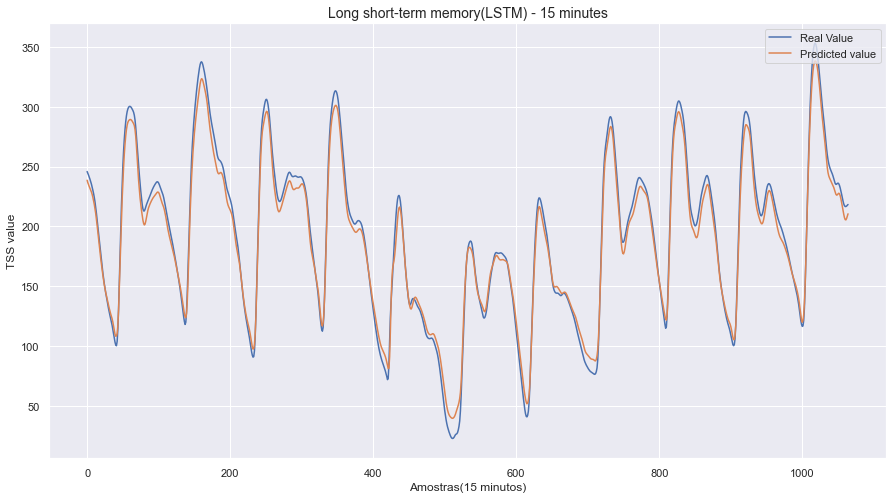

In [27]:
# Graph: actual value and predicted value
plt.figure(figsize = (15, 8))
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM) - 15 minutes', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('TSS value')
plt.legend(['Real Value', 'Predicted value'], loc='upper right')

In [28]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse1 = rmse(real, previsto_LSTM).numpy() 
print(rmse1)

mse = tf.keras.losses.MeanSquaredError()
mse1 = mse(real, previsto_LSTM).numpy()
print(mse1)

mae = tf.keras.losses.MeanAbsoluteError()
mae1 = mae(real, previsto_LSTM).numpy()
print(mae1)

mape = tf.keras.losses.MeanAbsolutePercentageError()
mape1 = mape(real, previsto_LSTM).numpy() 
print(mape1)

8.461068
71.589676
7.4519796
5.3290157


### Algorithm 2: Artificial Neural Network (ANN)

#### ANN 1

#### Preparing data for the algorithm

In [29]:
# Keras specific packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 

In [30]:
# Create independent(x) and dependent(y) variable columns
df_ann_x = df_for_training.filter(['S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)
df_ann_y = df_for_training.filter(['TSS_target'], axis=1)

In [31]:
df_ann_x.head()

S_I       S_NH      S_ND       X_ND         TSS
0  28.066969  34.921458  5.545698  15.813178  377.131123
1  30.359420  34.337683  5.882904  12.754084  418.421501
2  30.603369  33.788222  5.796989  12.299091  413.605679
3  30.767243  33.347855  5.754190  12.046154  410.668856
4  30.892948  32.953289  5.739111  11.888264  408.585538

In [32]:
df_ann_y.head()

TSS_target
0  197.191670
1  200.056489
2  201.682964
3  202.443577
4  202.608927

In [33]:
# Normalize the data
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(df_ann_x)
output_scaler = scaler_y.fit(df_ann_y)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(df_ann_y)
train_x_norm = input_scaler.transform(df_ann_x)

In [34]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, train_y_norm, test_size=0.30, random_state=40)
print(f'Training sets: x:{X_train.shape}, y:{y_train.shape}')
print(f'Test sets: x:{X_test.shape}, y:{y_test.shape}') 

Training sets: x:(12096, 5), y:(12096, 1)
Test sets: x:(5184, 5), y:(5184, 1)


#### Preparing the model

In [35]:
# Defining model
model = Sequential()
model.add(Dense(500, input_dim=df_ann_x.shape[1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(1))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               3000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 73,401
Trainable params: 73,401
Non-trainable params: 0
_________________________________________________________________


#### Training

In [44]:
# Compile the model
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
# model_ann = model.fit(X_train, y_train, epochs=20)

In [45]:
# #plot the loss and validation loss of the dataset
# history_df = pd.DataFrame(model_ann.history)
# plt.plot(history_df['loss'], label='loss')
# plt.plot(history_df['mae'], label='mae')
# plt.legend()

In [46]:
# Save trained model
#model.save('model_ann_1B.h5')

In [37]:
# Load the model
model_ann = load_model("models/model_ann_1B.h5")

#### Preparing test data for predictions

In [38]:
# Process test data 
# Create independent(x) and dependent(y) variable columns
df_final_x = teste_final.filter(['S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)
df_final_y = teste_final.filter(['TSS_target'], axis=1)

In [39]:
print(df_final_x.shape)
print(df_final_y.shape)

(1161, 5)
(1161, 1)


In [41]:
# Normalizing data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)

#### Results

In [42]:
# Make prediction with trained model
previsao_ann = model_ann.predict(final_x_norm)

In [46]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_ann)

In [47]:
# Create dataframe with real and forecast values
df2 = df_final_y.reset_index()

In [48]:
column_names = ["real", "previsto"]
df3 = pd.DataFrame(columns = column_names)

In [49]:
df3['real'] = df2['TSS_target'] 
df3['previsto'] = y_previsto 

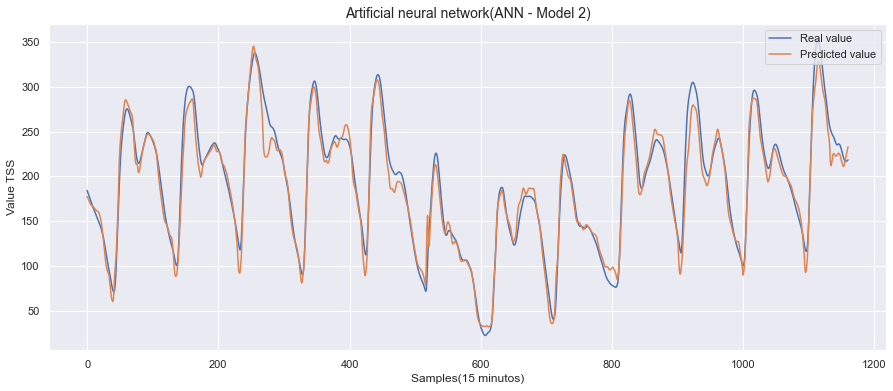

In [50]:
# TSS variable graph
plt.figure(figsize = (15, 6))
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network(ANN - Model 2)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('Value TSS')
plt.legend(['Real value', 'Predicted value'], loc='upper right')

In [51]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df3.real, df3.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df3.real, df3.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df3.real, df3.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df3.real, df3.previsto).numpy())

RMSE: 13.565704
MSE: 184.02835
MAE: 10.0332155
MAPE: 5.9984245


#### ANN 2

#### Preparing data for the algorithm

In [52]:
# Create columns of independent(x) and dependent(y) variables
df_ann_x = df_for_training.filter(['S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)
df_ann_y = df_for_training.filter(['TSS_target'], axis=1)

In [53]:
df_ann_x.head()

S_I       S_NH      S_ND       X_ND         TSS
0  28.066969  34.921458  5.545698  15.813178  377.131123
1  30.359420  34.337683  5.882904  12.754084  418.421501
2  30.603369  33.788222  5.796989  12.299091  413.605679
3  30.767243  33.347855  5.754190  12.046154  410.668856
4  30.892948  32.953289  5.739111  11.888264  408.585538

In [54]:
df_ann_y.head()

TSS_target
0  197.191670
1  200.056489
2  201.682964
3  202.443577
4  202.608927

In [55]:
# Normalize the data
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(df_ann_x)
output_scaler = scaler_y.fit(df_ann_y)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(df_ann_y)
train_x_norm = input_scaler.transform(df_ann_x)

In [56]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, train_y_norm, test_size=0.30, random_state=40)
print(f'Training set: x:{X_train.shape}, y:{y_train.shape}')
print(f'Test set: x:{X_test.shape}, y:{y_test.shape}')

Training set: x:(12096, 5), y:(12096, 1)
Test set: x:(5184, 5), y:(5184, 1)


#### Prepare model

In [57]:
# Set model
model = Sequential()
model.add(Dense(500, input_dim=df_ann_x.shape[1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(1))
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               3000      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 63,301
Trainable params: 63,301
Non-trainable params: 0
_________________________________________________________________


#### Training

In [2]:
# Compile the model
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
# model_ann = model.fit(X_train, y_train, epochs=20)

In [3]:
# Saving the trained model 
#model.save('modelos/model_ann_2B.h5')

In [59]:
# Load the model
model_ann = load_model("models/model_ann_2B.h5") 

#### Prepare test data for predictions

In [60]:
# Create independent(x) and dependent(y) variable columns
df_final_x = teste_final.filter(['S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)
df_final_y = teste_final.filter(['TSS_target'], axis=1)

In [61]:
print(df_final_x.shape)
print(df_final_y.shape)

(1161, 5)
(1161, 1)


In [62]:
# Normalize data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)

#### Results

In [63]:
# Make prediction with trained model
previsao_ann = model_ann.predict(final_x_norm)

In [64]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_ann)

In [65]:
# Create dataframe with actual and forecast values
df2 = df_final_y.reset_index()

In [66]:
column_names = ["real", "previsto"]
df3 = pd.DataFrame(columns = column_names)

In [67]:
df3['real'] = df2['TSS_target'] 
df3['previsto'] = y_previsto 

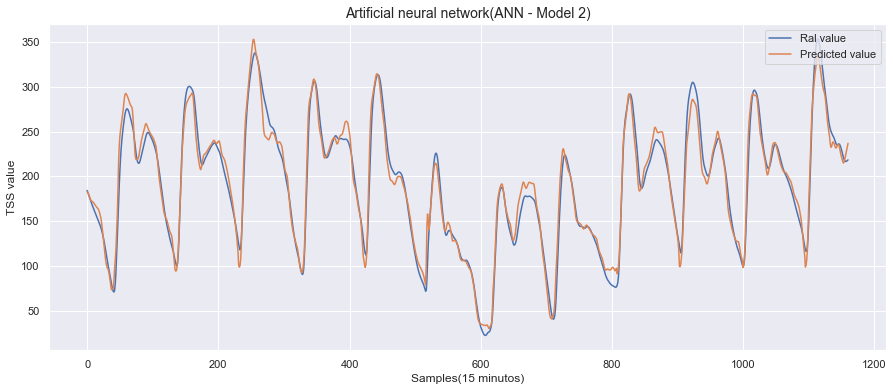

In [68]:
# TSS graph
plt.figure(figsize = (15, 6))
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network(ANN - Model 2)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('TSS value')
plt.legend(['Ral value', 'Predicted value'], loc='upper right')

In [69]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df3.real, df3.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df3.real, df3.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df3.real, df3.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df3.real, df3.previsto).numpy())

RMSE: 11.913415
MSE: 141.92944
MAE: 9.20084
MAPE: 5.764458


### Algorithm 3: Adaptive neuro-fuzzy inference system (ANFIS)
The model was developed in Matlab. The trained model can be found in the attached models folder.

<img src="figures/f7.png" hight="800" width="800">

In [70]:
df_entrada.head()

time (d)        S_I        S_S        X_I         X_S      X_B,H     X_B,A  \
0  0.000000  28.066969  59.047313  94.355715  356.843407  50.894638  0.094638   
1  0.010417  30.359420  44.060564  98.451711  403.466911  54.971138  0.131598   
2  0.020833  30.603369  42.103457  97.134587  398.790339  54.515963  0.135572   
3  0.031250  30.767243  40.836855  96.364946  395.681291  54.445814  0.140303   
4  0.041667  30.892948  39.920278  95.873859  393.245228  54.560720  0.145232   

        X_P       S_O      S_NO       S_NH      S_ND       X_ND     S_ALK  \
0  0.653099  0.017547  0.117359  34.921458  5.545698  15.813178  7.696519   
1  0.873977  0.024448  0.163515  34.337683  5.882904  12.754084  7.733646   
2  0.897778  0.025447  0.170197  33.788222  5.796989  12.299091  7.737372   
3  0.926121  0.026709  0.178608  33.347855  5.754190  12.046154  7.741579   
4  0.955677  0.028096  0.187699  32.953289  5.739111  11.888264  7.745834   

          TSS     Flow_rate       Temp  TSS_target  
0  377.131123  21086.383772  14.858080  197.191670  
1  418.421501  15136.796894  15.133197  200.056489  
2  413.605679  14558.437403  15.104875  201.682964  
3  410.668856  13892.458337  15.075487  202.443577  
4  408.585538  13239.722803  15.045215  202.608927

In [71]:
df_entrada.shape

(58465, 18)

In [73]:
df_treino = df_entrada[0:17280] # 180 days for training and testing
df_teste = df_entrada[34936:36001] # 10 days (holdout sample) for final test

In [74]:
# New dataset with selected features
data_treino = df_treino[['TSS','S_I','S_NH','S_ND','X_ND','TSS_target']]
data_teste = df_teste[['TSS','S_I','S_NH','S_ND','X_ND','TSS_target']]

In [75]:
data_treino.shape

(17280, 6)

In [76]:
data_teste.shape

(1065, 6)

In [70]:
# Export datasets in excel - the model will be made in matlab
# data_treino.to_excel(r'data_treino.xlsx', index = False)
# data_teste.to_excel(r'data_teste.xlsx', index = False)

In [77]:
# Read excel with results 
dataAnfis = pd.ExcelFile('datasets/dados.xlsx') 

In [78]:
# Worksheet names 
dataAnfis.sheet_names

['completo', 'treino', 'teste', 'resultado']

In [79]:
# Dataset with results
df_anfis = pd.read_excel(dataAnfis, 'resultado')

In [80]:
df_anfis.head()

TSS_real  TSS_previsto
0  245.906562    242.939158
1  244.468337    242.481238
2  242.890751    241.933669
3  241.201644    241.273661
4  239.412818    240.494596

#### Results

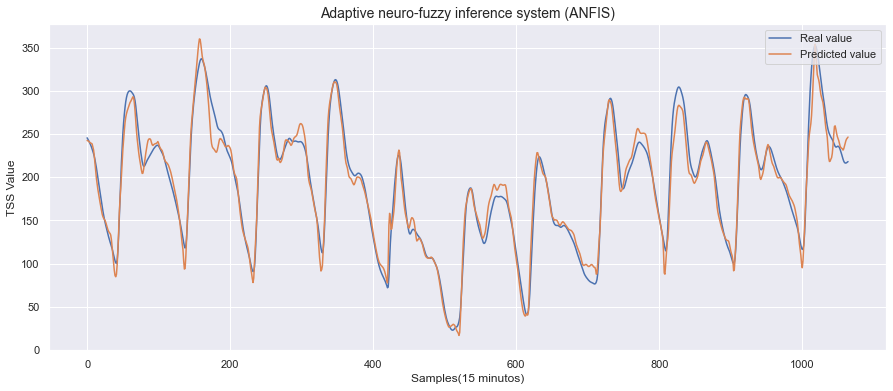

In [81]:
# TSS graph
plt.figure(figsize = (15, 6))
plt.plot(df_anfis.TSS_real)
plt.plot(df_anfis.TSS_previsto)
plt.title('Adaptive neuro-fuzzy inference system (ANFIS)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('TSS Value')
plt.legend(['Real value', 'Predicted value'], loc='upper right')

plt.show()

In [82]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df_anfis.TSS_real, df_anfis.TSS_previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df_anfis.TSS_real, df_anfis.TSS_previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df_anfis.TSS_real, df_anfis.TSS_previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df_anfis.TSS_real, df_anfis.TSS_previsto).numpy())

RMSE: 12.894497
MSE: 166.26805114746094
MAE: 9.711019515991211
MAPE: 5.820327281951904


### Algorithm 4: Gaussian Mixture Regression

#### Prepare data for the algorithm

In [ ]:
df_for_training = df_treino.filter(['TSS_target','S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)

In [ ]:
# Create columns of independent (x) and dependent (y) variables
df_gmr_x = df_for_training.filter(['S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)
df_gmr_y = df_for_training.filter(['TSS_target'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Normalize the data
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(df_gmr_x)
output_scaler = scaler_y.fit(df_gmr_y)
# Apply the scaler to training data
train_x_norm = input_scaler.transform(df_gmr_x)
train_y_norm = output_scaler.transform(df_gmr_y)

In [ ]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, train_y_norm, test_size=0.30, random_state=40)
print(f'Conjuntos de treino: x:{X_train.shape}, y:{y_train.shape}')
print(f'Conjuntos de teste: x:{X_test.shape}, y:{y_test.shape}')

#### Preparing the model

In [ ]:
#!pip install gmr

In [ ]:
from gmr.sklearn import GaussianMixtureRegressor
from matplotlib import pyplot
from sklearn.metrics import r2_score

In [ ]:
import time
from sklearn.model_selection import GridSearchCV,learning_curve

In [ ]:
model = GridSearchCV(
    GaussianMixtureRegressor(n_components=2),param_grid={"n_components": [2,3,4,5,10,15,20,25,30]},
)

#### Training

In [ ]:
t0 = time.time()
gmr = model.fit(X_train,y_train) # Scaled X_train and y_train
model_fit = time.time() - t0
print("GMR complexity and bandwidth selected and model fitted in %.3f s" % model_fit)

In [ ]:
# Search results for better parameters
gmr.cv_results_

In [ ]:
# Best parameters
gmr.best_estimator_

#### Preparing test data for predictions

In [ ]:
# Create columns of independent (x) and dependent (y) variables
df_final_x = df_teste_final.filter(['S_I', 'S_NH', 'S_ND', 'X_ND', 'TSS'], axis=1)
df_final_y = df_teste_final.filter(['TSS_target'], axis=1)

In [ ]:
# Normalize data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)
final_y_norm = output_scaler.transform(df_final_y)

In [ ]:
# Test with the best parameter. It is the same as gmr.best_estimator_.predict(final_x_norm)
y_pred = gmr.predict(final_x_norm) 
y_pred

#### Results

In [ ]:
# Make prediction with trained model
previsao_gmr = y_pred

In [ ]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_gmr)

In [ ]:
# Create dataframe with actual and forecast values
df2 = df_final_y.reset_index()

In [ ]:
column_names = ["real", "previsto"]
dfTSSgmr = pd.DataFrame(columns = column_names)

In [ ]:
dfTSSgmr['real'] = df2['TSS_target'] 
dfTSSgmr['previsto'] = y_previsto 

In [ ]:
dfTSSgmr.to_csv('dfTSSgmr.csv', index=False) 

In [ ]:
# TSS graph
plt.figure(figsize = (15, 6))
plt.plot(dfTSSgmr.real)
plt.plot(dfTSSgmr.previsto)
plt.title('Gaussian Mixture Regression', family='Arial', fontsize=14)
plt.xlabel('Amostras(15 minutos)')
plt.ylabel('Valor TSS')
plt.legend(['Valor real', 'Valor previsto'], loc='upper right')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Evaluation metrics
rmse = mean_squared_error(df2.TSS_target, y_previsto, squared=False)
print('RMSE:',rmse)

mse = mean_squared_error(df2.TSS_target, y_previsto)
print('MSE:',mse)

mae = mean_absolute_error(df2.TSS_target, y_previsto)
print('MAE:',mae)

mape = mean_absolute_percentage_error(df2.TSS_target, y_previsto)
print('MAPE:',mape)

### Algorithm 5: Transformers

The Transformers algorithm was completely developed in a separate notebook. Here are the prediction results. If you have any questions, just look in the attached notebook.

In [83]:
df_transformer = pd.read_csv('datasets/previsão_transformer1.csv') 

In [84]:
df_transformer.head()

previstoT
0  192.28925
1  189.94853
2  187.45016
3  184.79236
4  182.85002

In [85]:
column_names = ["real", "previsto"]
df_trans = pd.DataFrame(columns = column_names)

In [86]:
df_trans.real = df3.real.iloc[0:960]

In [87]:
df_trans.previsto = df_transformer.previstoT[0:960]

In [88]:
df_trans.head()

real   previsto
0  184.351319  192.28925
1  182.293481  189.94853
2  180.339317  187.45016
3  178.305726  184.79236
4  176.133887  182.85002

#### Results

In [89]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df_trans.real, df_trans.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df_trans.real, df_trans.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df_trans.real, df_trans.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df_trans.real, df_trans.previsto).numpy())

RMSE: 5.4249287
MSE: 29.429851531982422
MAE: 3.905517101287842
MAPE: 3.3015193939208984


## Comparison LSTM x ANN x ANFIS x Transformer

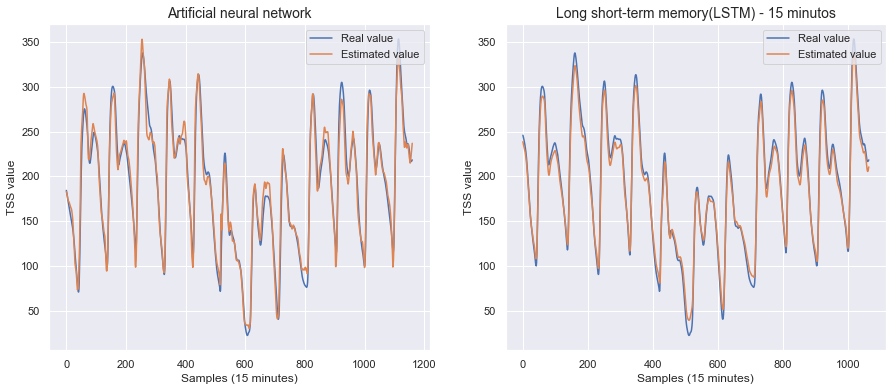

In [90]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('TSS value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM) - 15 minutos', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('TSS value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')

plt.show()

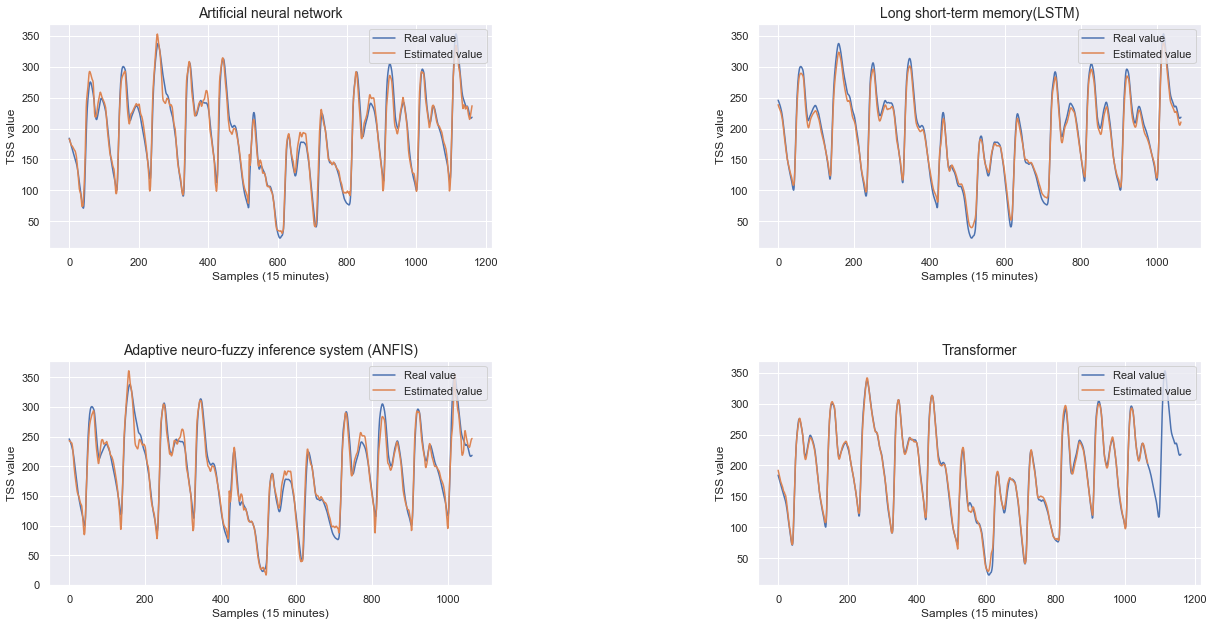

In [91]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('TSS value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')


plt.subplot(2, 2, 2)
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM)', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('TSS value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')


plt.subplot(2, 2, 3)
plt.plot(df_anfis.TSS_real)
plt.plot(df_anfis.TSS_previsto)
plt.title('Adaptive neuro-fuzzy inference system (ANFIS)', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('TSS value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')

plt.subplot(2, 2, 4)
plt.plot(df3.real)
plt.plot(df_transformer.previstoT)
plt.title('Transformer', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('TSS value')
plt.legend(['Real value', 'Estimated value'], loc='upper right') 

plt.subplots_adjust(left=0.2,
                    bottom=0.12, 
                    right=1, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.5)

plt.show()

### GRM Forecast

In [92]:
# Load data
dfGRM = pd.read_csv('datasets/dfTSSgmr.csv')
dfGRM.head() 

real    previsto
0  245.906562  249.321413
1  244.468337  246.854674
2  242.890751  245.019418
3  241.201644  243.614156
4  239.412818  242.261220

In [93]:
# Evaluation metric
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(dfGRM.real, dfGRM.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(dfGRM.real, dfGRM.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(dfGRM.real, dfGRM.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(dfGRM.real, dfGRM.previsto).numpy())

RMSE: 12.220029
MSE: 149.32911682128906
MAE: 9.237936019897461
MAPE: 5.580470561981201


### Comparison graph

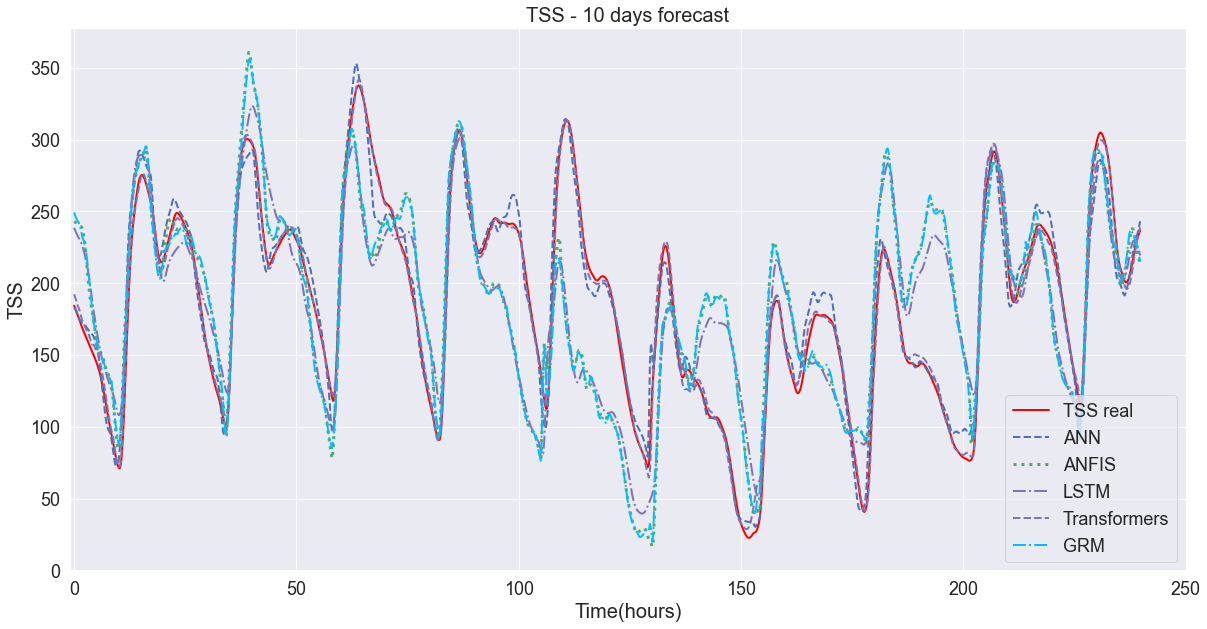

In [94]:
x_axis = np.arange(0,240,0.25) 
plt.figure(figsize = (20, 10)) 
plt.plot(x_axis,df3.real.iloc[0:960],'red', linewidth=2)   
plt.plot(x_axis,df3.previsto.iloc[0:960], 'b', linestyle='--', linewidth=2) 
plt.plot(x_axis,df_anfis.TSS_previsto.iloc[0:960], 'g', linestyle=':', linewidth=3) 
plt.plot(x_axis,previsto_LSTM[0:960],'m', linestyle='-.', linewidth=2) 

plt.plot(x_axis,df_transformer.previstoT[0:960],'m', linestyle='--', linewidth=2)


plt.plot(x_axis,dfGRM.previsto.iloc[0:960],'deepskyblue', linestyle='-.', linewidth=2)

plt.legend(['TSS real','ANN', 'ANFIS','LSTM', 'Transformers', 'GRM'], fontsize=18)
plt.title('TSS - 10 days forecast', fontsize=20)
plt.xlim([-1, 250])
plt.xlabel('Time(hours)', fontsize=20)
plt.ylabel('TSS', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()  

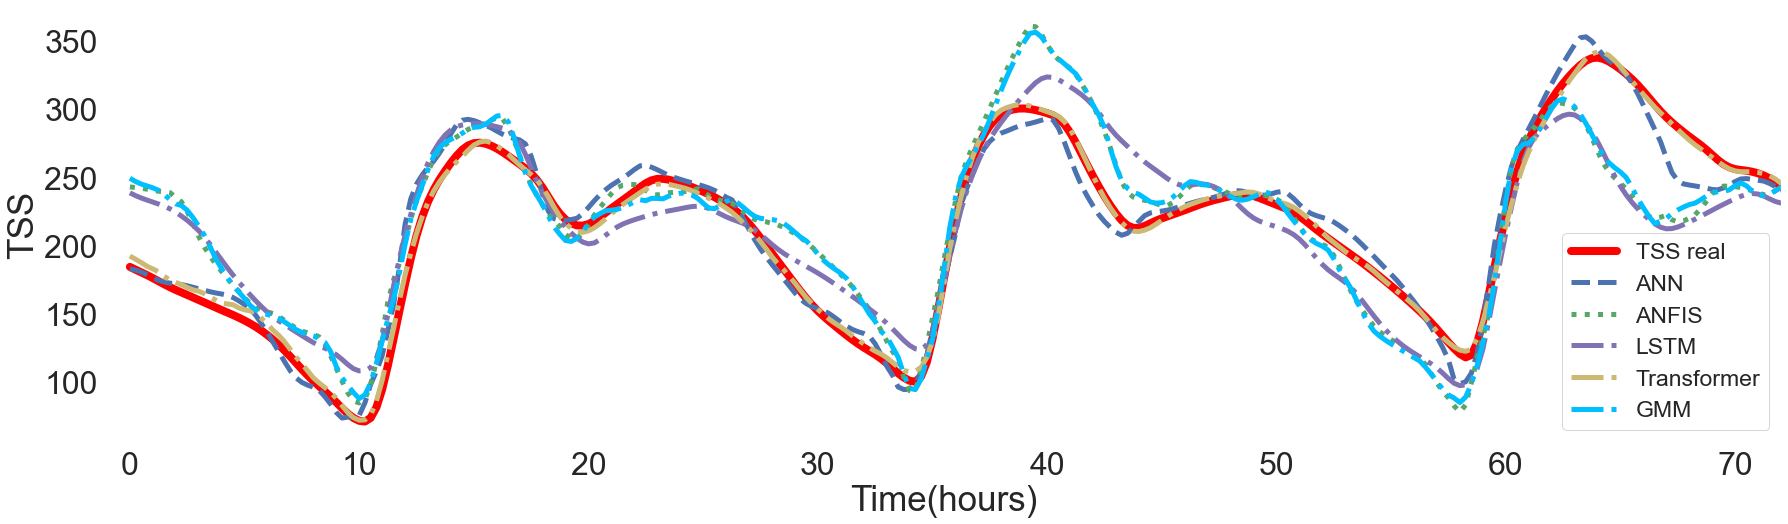

In [95]:
plt.rcParams['axes.facecolor'] = 'white'
x_axis = np.arange(0,72.5,0.25) # Values for the x axis
plt.figure(figsize = (30, 8))
plt.plot(x_axis,df3.real.iloc[0:290],'red', linewidth=8)   
plt.plot(x_axis,df3.previsto.iloc[0:290], 'b', linestyle='--', linewidth=5) 
plt.plot(x_axis,df_anfis.TSS_previsto.iloc[0:290], 'g', linestyle=':', linewidth=5) 
plt.plot(x_axis,previsto_LSTM[0:290],'m', linestyle='-.', linewidth=5) 

plt.plot(x_axis,df_transformer.previstoT[0:290],'y', linestyle='-.', linewidth=5)


plt.plot(x_axis,dfGRM.previsto.iloc[0:290],'deepskyblue', linestyle='-.', linewidth=5)

plt.legend(['TSS real','ANN', 'ANFIS','LSTM', 'Transformer', 'GMM'], fontsize=23)

plt.xlim([-1, 72])
plt.xlabel('Time(hours)', fontsize=35)
plt.ylabel('TSS', fontsize=35)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

#plt.savefig('TSS_juntos1.pdf', dpi=800, format='pdf', bbox_inches='tight')
plt.show() 

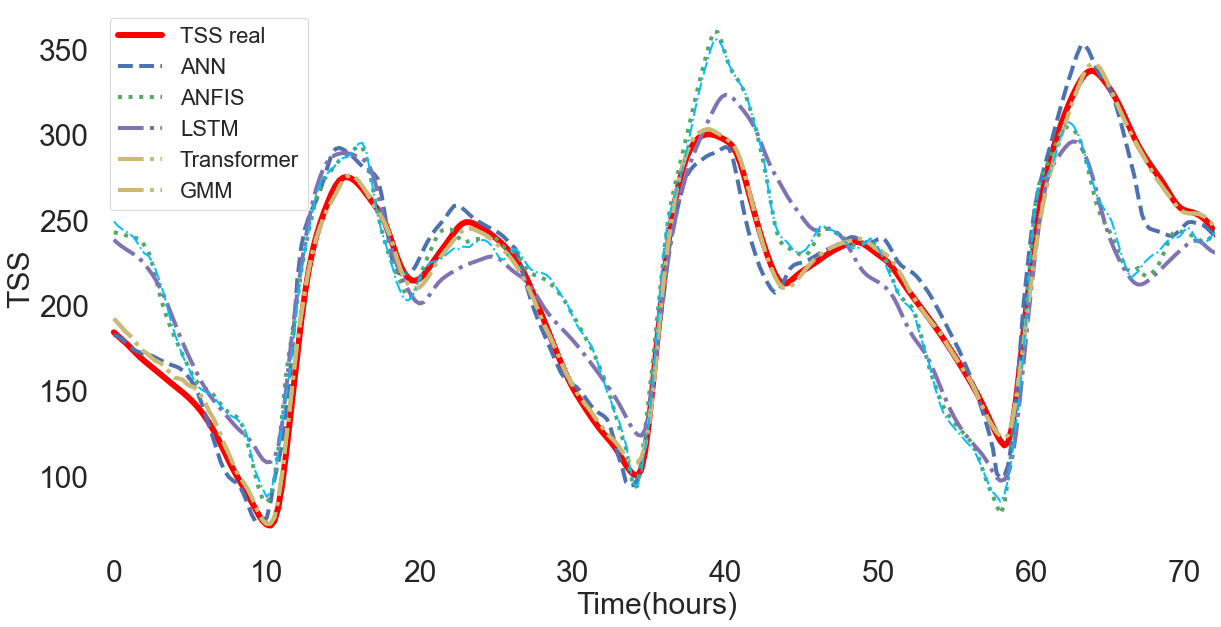

In [96]:
x_axis = np.arange(0,72.5,0.25) # Values for the x axis
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[0:290],'red', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[0:290], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.TSS_previsto.iloc[0:290], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[0:290],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_transformer.previstoT[0:290],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,df_transformer.previstoT[0:290],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[0:290],'deepskyblue', linestyle='-.', linewidth=2)

plt.legend(['TSS real','ANN', 'ANFIS','LSTM', 'Transformer', 'GMM'], fontsize=22)

plt.xlim([-1, 72])
plt.xlabel('Time(hours)', fontsize=30)
plt.ylabel('TSS', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.grid(color='red', linestyle='-.', linewidth=0.7)

#plt.savefig('TSS_juntos.pdf', dpi=600, format='pdf', bbox_inches='tight')
plt.show() 

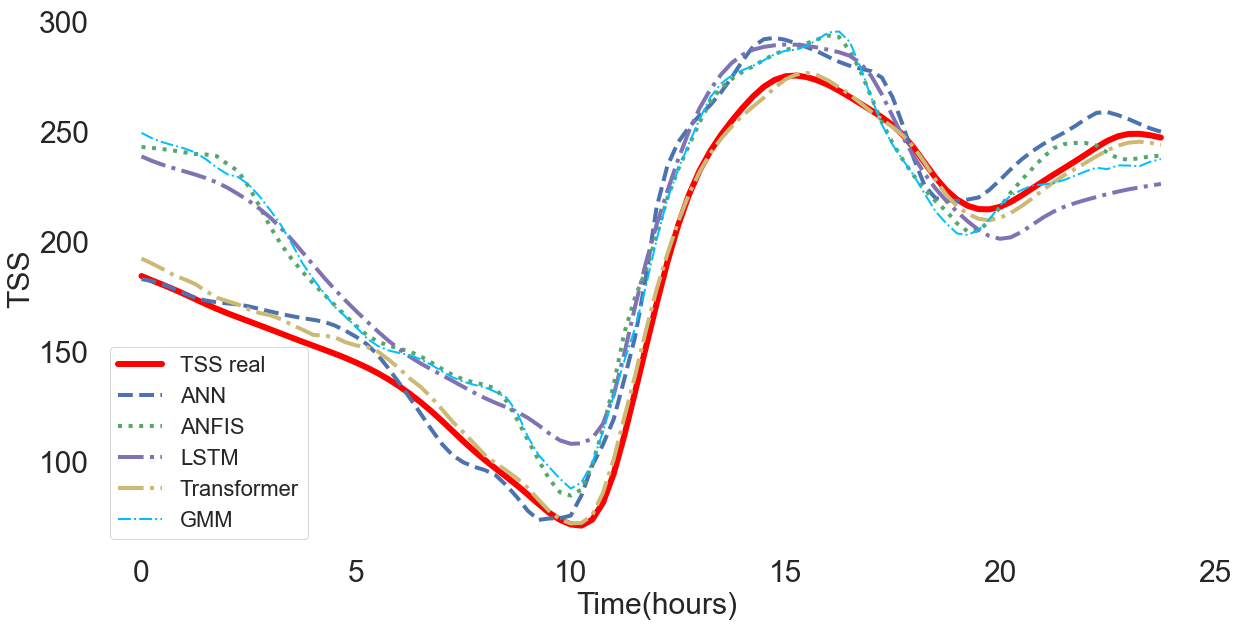

In [97]:
x_axis = np.arange(0,24,0.25) # Values for the x axis
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[0:96],'red', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[0:96], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.TSS_previsto.iloc[0:96], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[0:96],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_transformer.previstoT[0:96],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[0:96],'deepskyblue', linestyle='-.', linewidth=2)

plt.legend(['TSS real','ANN', 'ANFIS','LSTM', 'Transformer', 'GMM'], fontsize=22)

plt.xlim([-1, 25])
plt.xlabel('Time(hours)', fontsize=30)
plt.ylabel('TSS', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.savefig('TSS1day.pdf', dpi=600, format='pdf', bbox_inches='tight')
plt.show() 

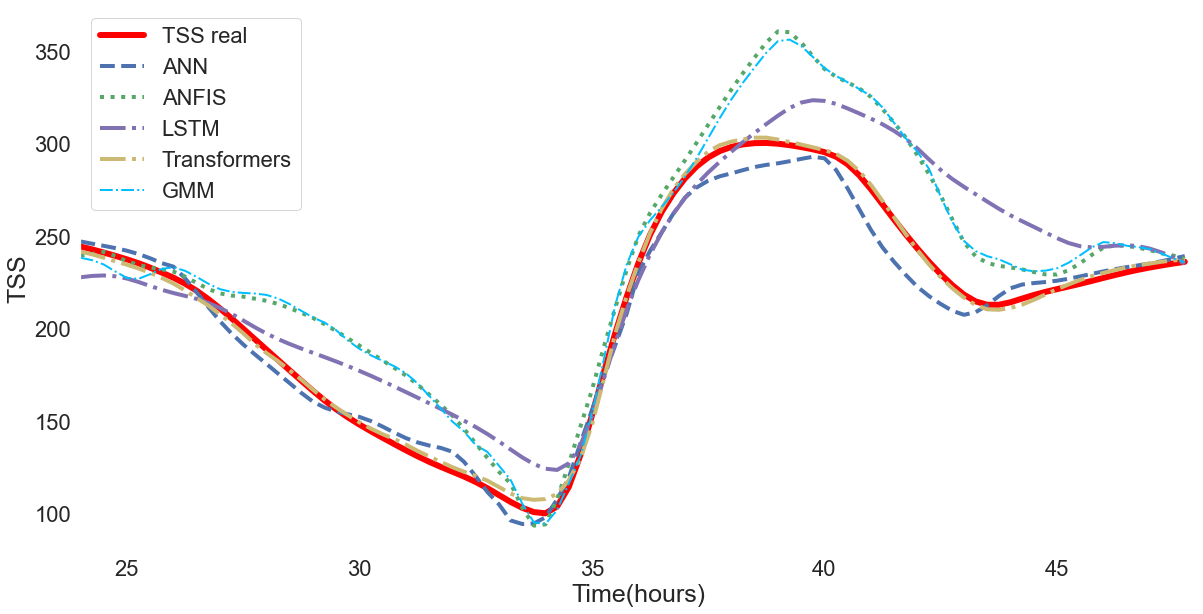

In [98]:
x_axis = np.arange(24,48,0.25) # Values for the x axis
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[97:193],'red', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[97:193], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.TSS_previsto.iloc[97:193], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[97:193],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_transformer.previstoT[97:193],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[97:193],'deepskyblue', linestyle='-.', linewidth=2)

plt.legend(['TSS real','ANN', 'ANFIS','LSTM', 'Transformers', 'GMM'], fontsize=22)

plt.xlim([24, 48])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('TSS', fontsize=25)
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('TSS', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.savefig('TSS2day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show() 

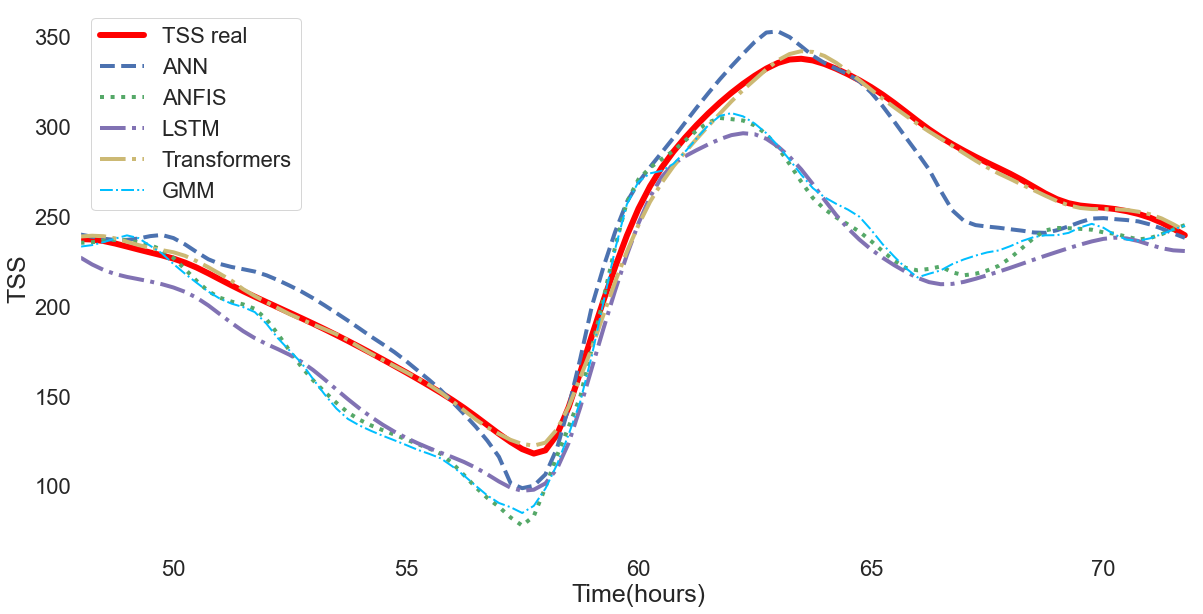

In [99]:
x_axis = np.arange(48,72,0.25) # Values for the x axis
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[194:290],'red', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[194:290], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.TSS_previsto.iloc[194:290], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[194:290],'m', linestyle='-.', linewidth=4) 
plt.plot(x_axis,df_transformer.previstoT[194:290],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[194:290],'deepskyblue', linestyle='-.', linewidth=2)

plt.legend(['TSS real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)

plt.xlim([48, 72])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('TSS', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.savefig('TSS3day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show()  